## SeaBorn Gallery

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### ScatterPlot

<Axes: xlabel='carat', ylabel='price'>

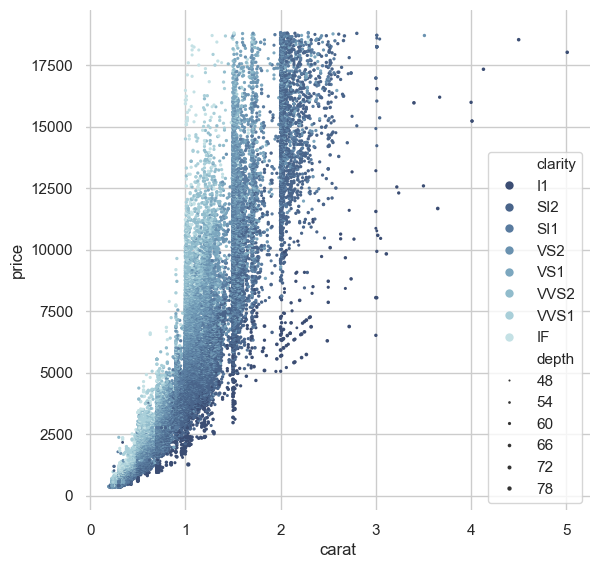

In [3]:
sns.set_theme(style="whitegrid") #background
diamonds = sns.load_dataset("diamonds")  #built in dataset loaded

f, ax = plt.subplots(figsize=(6.5, 6.5)) 
#Creates the figure and axes objects using Matplotlib (which Seaborn builds on)
sns.despine(f, left=True, bottom=True) 
#Cleans the look of the plot by removing the left and bottom borders (called “spines”).
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"] 
#Defines a custom order for how the diamond clarity levels will be shown in the color legend.
sns.scatterplot(x="carat", y="price", 
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 10), linewidth=0, #removes border around each dot
                data=diamonds, ax=ax)

# custom_palette = {
#     "I1": "#d73027",     # red
#     "SI2": "#fc8d59",    # orange
#     "SI1": "#fee090",    # yellow
#     "VS2": "#e0f3f8",    # light blue
#     "VS1": "#91bfdb",    # blue
#     "VVS2": "#4575b4",   # dark blue
#     "VVS1": "#542788",   # purple
#     "IF": "#f0f0f0"      # white/gray
# }

# sns.scatterplot(
#     x="carat", y="price",
#     hue="clarity",
#     palette=custom_palette,
#     ...
# )

<Axes: >

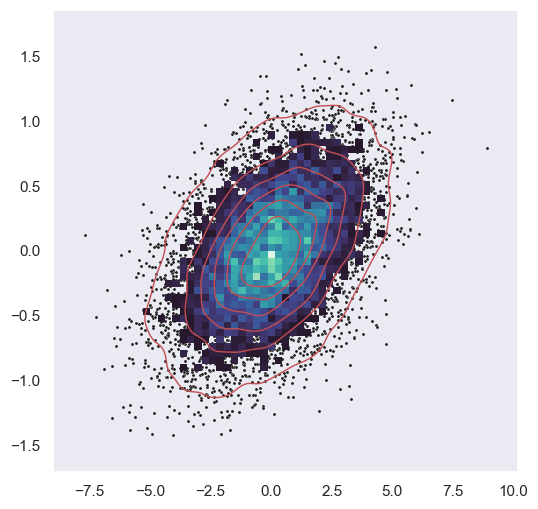

In [34]:
sns.set_theme(style="dark")
# White background
# Dark grid lines
# Darker axis lines and labels

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(4, .4), (.4, .2)]
#   x scatter 2, corelation 0.4, y scatter 0.2
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color="0.1")
#Tiny black dots (color=".15" is a gray tone: 15% black)
sns.histplot(x=x, y=y, bins=55, pthresh=.1, cmap="mako")
#Makes a heatmap showing where points are dense
# bins=50 → 50×50 grid
# pthresh=.1 → only show bins with >10% of the max count
# cmap="mako" → cool blue color map
sns.kdeplot(x=x, y=y, levels=7, color="r", linewidths=1)
#KDE = Kernel Density Estimation = smooth lines showing where data is densest

### LinePlot

<Axes: xlabel='timepoint', ylabel='signal'>

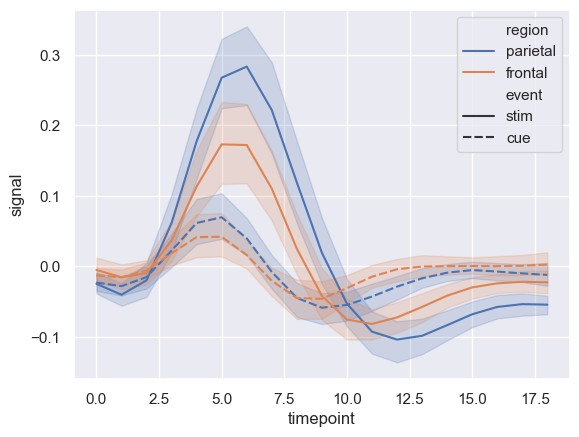

In [3]:
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

### Hisplot

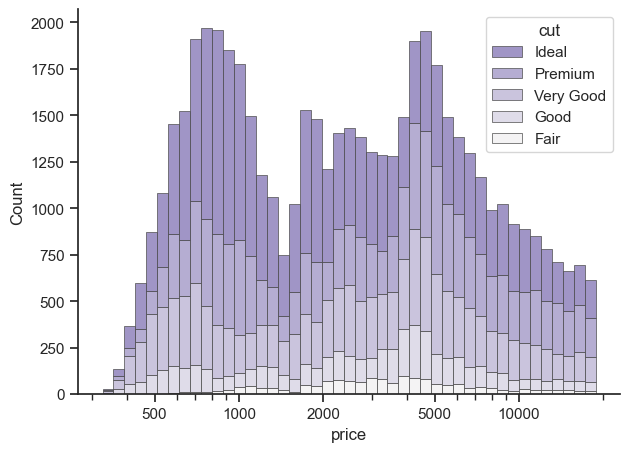

In [ ]:
import matplotlib as mpl


sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price",         # X-axis → Diamond price
    hue="cut",         # Color group by cut quality
    multiple="stack",  # Stack bars (rather than overlay)
    palette="light:m_r",  # Nice red-to-pink palette
    edgecolor=".3",    # Grey edges for each bar
    linewidth=.5,      # Thin outlines
    log_scale=True     # Logarithmic X-axis (price)
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])
# Purpose:
# After using log_scale=True, Seaborn switches to log ticks like 10¹, 10², etc.
# You’re overriding that to:
# Use plain numbers like 500, 1000, etc.
# Place specific custom tick marks to guide the reader

### Boxplot

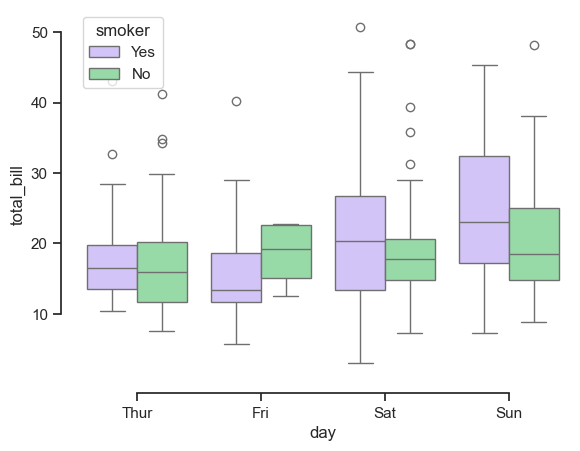

In [7]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

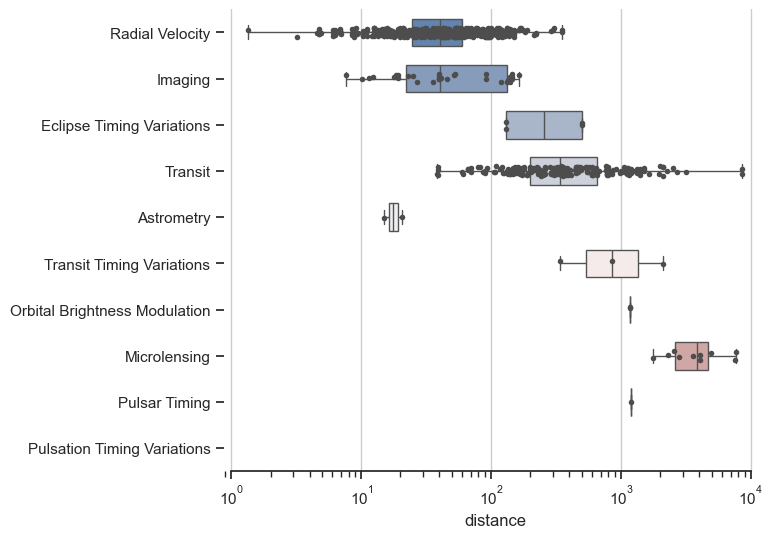

In [10]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    planets, x="distance", y="method", hue="method",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(planets, x="distance", y="method", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### Barplot


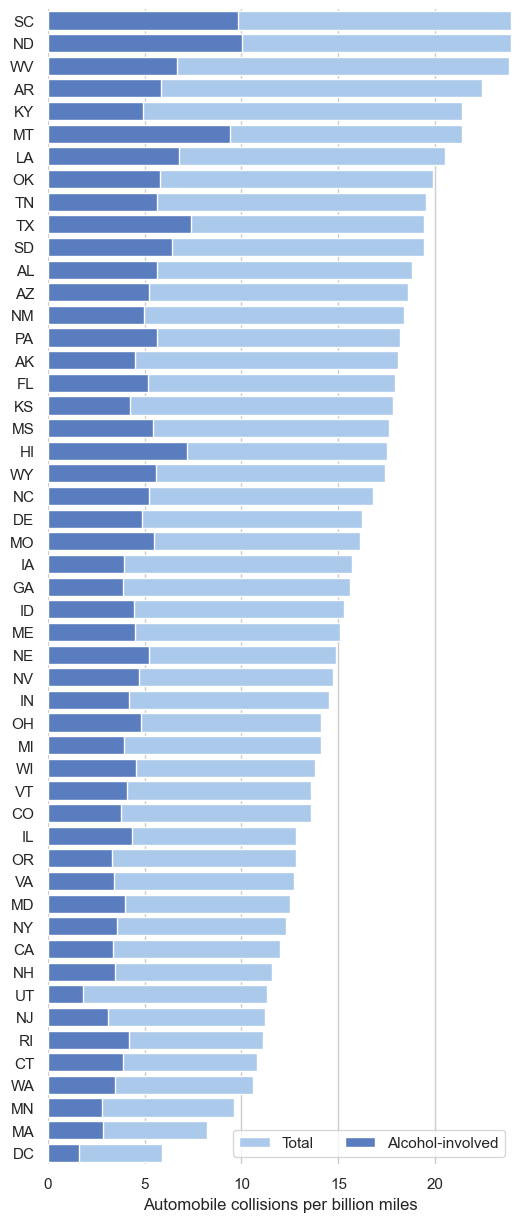

In [8]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

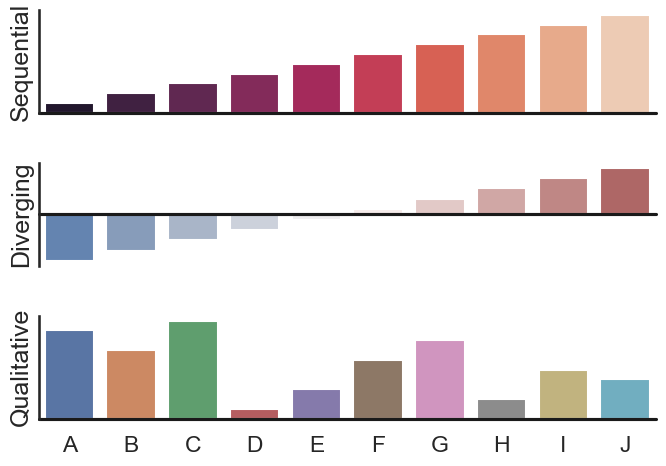

In [9]:
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, hue=x, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, hue=x, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, hue=x, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

### Regplot

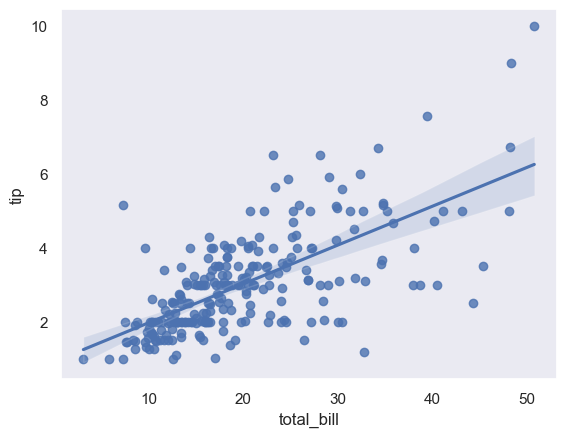

In [12]:

# Load a dataset
tips = sns.load_dataset('tips')

# Create regression plot
sns.regplot(x='total_bill', y='tip', data=tips)
plt.show()

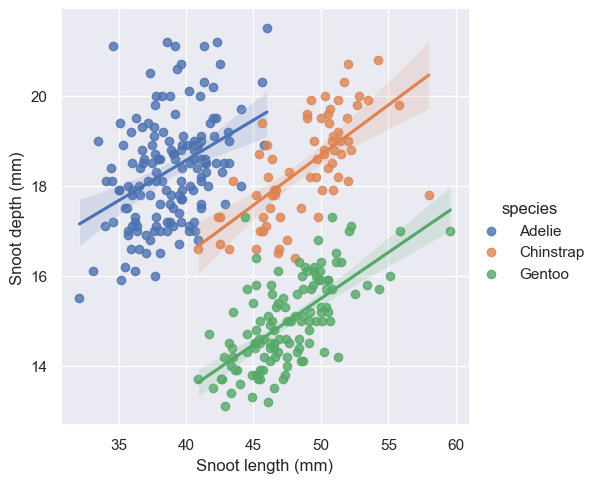

In [13]:
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")